<a href="https://colab.research.google.com/github/TiagoHarari/MIT_LIFT_Research/blob/main/Final_G14_MIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

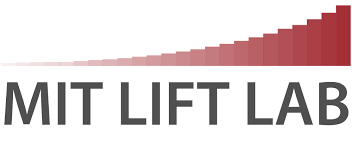

**Massachusetts Institute of Technology (MIT)**

**Low Income Firms Transformation Laboratory (LIFT LAB)**



*   Tiago Harari
*   Nicolas Babis
*   Octavio de Astoreca

**Empirical Project: Factors that Affect the Survival of Microbusinesses in Buenos Aires, Argentina.**



# Data loading and cleaning

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# ...

In [2]:
from google.colab import drive

# drive.mount('/content/drive')
#file_path = '/content/final_data_G14_MIT.xlsx'  # Reemplaza con la ruta de tu archivo
file_path = '/content/final_data_G14_MIT.xlsx'

Primary DataFrame

**This data base comes from our primary data that we collected in field work**

In [3]:
df = pd.read_excel(file_path, sheet_name='Sheet1')
print(df.columns)
df.head()

Index(['negocio', 'nombre_negocio', 'rejas', 'apertura', 'trabajadores',
       'trabajadores_fijos', 'expectativa_trabajadores', 'ventas',
       'ventas_expectativas', 'inventario', 'inventario_expectativas',
       'nivel_inventario', 'precios', 'precios_expectativa', 'impacto_precios',
       'impacto_competencia', 'propiedad', 'impacto_crimen',
       'potencial_crecimiento', 'edad', 'educación', 'zona', 'credito_bancos',
       'credito_proveedores', 'credito_familia', 'credito_gobierno',
       'credito_privado', 'genero', 'densidad comercial'],
      dtype='object')


,negocio,nombre_negocio,rejas,apertura,trabajadores,trabajadores_fijos,expectativa_trabajadores,ventas,ventas_expectativas,inventario,...,edad,educación,zona,credito_bancos,credito_proveedores,credito_familia,credito_gobierno,credito_privado,genero,densidad comercial
0,Heladerías,Mistica,No,1984,4,1,Disminuya,Igual,Mayores,Disminuyó,...,De 31 a 40,Secundaria,La Boca,No,No,No,No,No,Hombre,22
1,Kioskos,kiosko,Sí,2006,8,8,Disminuya,Peor,Menores,Disminuyó,...,De 31 a 40,Preparatoria,Zona Centro,Sí,No,Sí,No,No,Hombre,23
2,Cafeterías,Eureka,Sí,2023,5,3,Aumente,Igual,Mayores,Permaneció igual,...,De 31 a 40,Universidad y más,Virrey del Pino,No,No,No,No,Sí,Preferencia de no especificar,21
3,Almacenes,entendidos,No,2018,3,3,Permanezca igual,Igual,Iguales,Permaneció igual,...,De 31 a 40,Secundaria,Virrey del Pino,No,Sí,No,No,Sí,Hombre,21
4,Almacenes,Vuena,No,2023,6,6,Aumente,Mejor,Mayores,Permaneció igual,...,De 41 a 50,Preparatoria,Gaona,No,No,Sí,No,No,Hombre,27


In [4]:
# Identificar las columnas relacionadas con los créditos y el tipo de negocio
credit_columns = ['credito_bancos', 'credito_proveedores', 'credito_familia', 'credito_gobierno', 'credito_privado']
business_column = 'negocio'

# Filtrar los datos donde se registra algún crédito utilizado y contar los créditos por tipo
credit_usage = df[credit_columns].apply(pd.Series.value_counts).loc['Sí']

# Obtener el tipo de crédito más utilizado
most_used_credit = credit_usage.idxmax(), credit_usage.max()

most_used_credit


('credito_familia', 57)

In [ ]:
# Calcular la edad de los negocios
df['edad_negocio'] = 2024 - df['apertura']

# Clasificar los negocios en categorías según su edad
df['categoria_edad'] = pd.cut(df['edad_negocio'], bins=[0, 5, 10, 20, float('inf')],
                              labels=['0-5 años', '6-10 años', '11-20 años', '21+ años'])

# Agregar una columna que indique si un negocio utiliza algún crédito
df['usa_credito'] = df[credit_columns].apply(lambda row: 'Sí' if 'Sí' in row.values else 'No', axis=1)

# Comparar la proporción de negocios que usan crédito según la categoría de edad
credit_by_age = df.groupby('categoria_edad')['usa_credito'].value_counts(normalize=True).unstack() * 100

credit_by_age


<ipython-input-46-bf1d8e201eac>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_by_age = df.groupby('categoria_edad')['usa_credito'].value_counts(normalize=True).unstack() * 100


usa_credito,No,Sí
categoria_edad,,
0-5 años,52.272727,47.727273
6-10 años,53.658537,46.341463
11-20 años,43.589744,56.410256
21+ años,63.414634,36.585366


Secondary DataFrame

In [ ]:
print(df.dtypes)

negocio                     object
nombre_negocio              object
rejas                       object
apertura                     int64
trabajadores                 int64
trabajadores_fijos           int64
expectativa_trabajadores    object
ventas                      object
ventas_expectativas         object
inventario                  object
inventario_expectativas     object
nivel_inventario            object
precios                     object
precios_expectativa         object
impacto_precios             object
impacto_competencia         object
propiedad                   object
impacto_crimen              object
potencial_crecimiento       object
edad                        object
educación                   object
zona                        object
credito_bancos              object
credito_proveedores         object
credito_familia             object
credito_gobierno            object
credito_privado             object
genero                      object
dtype: object


In [ ]:
# Print the levels of string variables
print("\nLevels of string variables:")
for col in df.select_dtypes(include=['object', 'string']).columns:
    print(f"{col}: {df[col].unique().tolist()}")


Levels of string variables:
negocio: ['Heladerías', 'Kioskos', 'Cafeterías', 'Almacenes', 'Confiterías y Panaderías', 'Fiambrera', 'Verdulerías', 'Pescaderías', 'Bares y pequeños restaurantes', 'Dietéticas', 'Carnicerías', 'Granjas', 'Cervecerías']
nombre_negocio: ['Mistica', 'kiosko', 'Eureka', 'entendidos', 'Vuena', 'panttini', 'mydeco', 'Veintidós cafe', 'cuervo fiambreria', 'Libertad', 'saona', 'El buen comer', 'Finca Gonzáles tienda gourmet', 'Daniela', 'Alejandra', 'Sabina', 'Talento', 'Golosweet', 'Aluna Café', 'La Boqueria', 'Eneldo', 'Abarrotes', 'Azul Café', 'Coco Ecotienda', 'Emplatame', 'KIOSKO-BAZAR', 'CAFE', 'CARNICERÍA TUS AMIGOS', 'Bellota -Cafetera & Almuerzos', 'Dietetica Callao', 'Honf fa', 'Zeus', 'Pescadería Belgrano', 'Bdb', 'Up', 'Verduleria Miro', 'Los 4 hermanos', 'Verluderia julia', 'El sembrador', 'Pañelera cinco esquinas', 'Mística caballito', 'Juan', 'Autoservicio santino', 'Sabor porteño', 'La mitad mas 1', 'Confiteria san juan', 'Hola Verde', 'Bar Roma',

In [ ]:
# Crear variables categoricas ordenadas a partir de los str
# La idea es poder armar una matriz de correlación de variables "numéricas"
variables = {
    'rejas': ['No', 'Sí'],
    'expectativa_trabajadores': ['Disminuya', 'Aumente', 'Permanezca igual'],
    'ventas': ['Peor', 'Igual', 'Mejor'],
    'ventas_expectativas': ['Menores', 'Iguales', 'Mayores',],
    'inventario': ['Disminuyó', 'Permaneció igual', 'Aumentó'],
    'inventario_expectativas': ['Disminuya', 'Permanezca igual', 'Incremente'],
    'nivel_inventario': ['Muy poco', 'En su nivel correcto', 'Demasiado grande'],
    'precios': ['Bajó',  'Permaneció igual','Aumentó'],
    'precios_expectativa': ['Disminuyan', 'Permanezcan igual', 'Aumenten'],
    'impacto_precios': ['Nada', 'Poco', 'Algo', 'Moderado', 'Mucho'], # Algo < Moderado ???
    'impacto_competencia': ['Nada', 'Poco','Algo', 'Moderado','Mucho'],
    'propiedad': ['Rentado', 'Propio'],
    'impacto_crimen': ['Nada', 'Poco', 'Algo', 'Moderado', 'Mucho'],
    'potencial_crecimiento': ['No','Sí'],
    'edad': ['Menos de 20', 'De 21 a 30', 'De 31 a 40', 'De 41 a 50', 'De 51 a 60', 'Más de 60'],
    'educación': ['Sin estudios', 'Primaria', 'Secundaria', 'Preparatoria', 'Universidad y más'], # Preparatoria ????
    'credito_bancos': ['No', 'Sí'],
    'credito_proveedores': ['No', 'Sí'],
    'credito_familia': ['No', 'Sí'],
    'credito_gobierno': ['No', 'Sí'],
    'credito_privado': ['No', 'Sí'],
    'genero': ['Hombre', 'Mujer']
}

for var, levels in variables.items():
    if var in df.columns:
        df[var] = pd.Categorical(df[var], categories=levels, ordered=True)
        df[f"{var}_cat"] = df[var].cat.codes

df['genero_cat'] = df['genero_cat'].apply(lambda x: np.nan if x < 0 else x)



# Research



---



## Correlation Matrix Heatmap

Algunas correlaciones (bajas) que podrías explorar:
- Mujers tienen + acceso a crédito del gobierno. Por qué?
- Locales + nuevos, + impacto en precios
- Locales + nuevos, trabajadores + jóvenes

In [ ]:
df_subset = df[columns]
pd.options.display.float_format = '{:.2f}'.format
df_subset.describe()

,apertura,trabajadores,trabajadores_fijos,rejas_cat,expectativa_trabajadores_cat,ventas_cat,ventas_expectativas_cat,inventario_cat,inventario_expectativas_cat,precios_cat,...,impacto_crimen_cat,potencial_crecimiento_cat,edad_cat,educación_cat,credito_bancos_cat,credito_proveedores_cat,credito_familia_cat,credito_gobierno_cat,credito_privado_cat,genero_cat
count,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00,...,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00,218.00
mean,2013.19,3.95,3.52,0.31,1.72,0.98,1.59,1.09,1.44,1.39,...,0.92,0.80,3.00,2.35,0.11,0.16,0.25,0.03,0.15,0.39
std,11.69,2.48,2.52,0.46,0.55,0.77,0.71,0.67,0.62,0.63,...,1.26,0.40,1.14,1.07,0.31,0.37,0.44,0.16,0.36,0.49
min,1980.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2009.00,2.00,2.00,0.00,2.00,0.00,1.00,1.00,1.00,1.00,...,0.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2018.00,3.00,3.00,0.00,2.00,1.00,2.00,1.00,2.00,1.00,...,0.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2022.00,5.00,5.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,...,1.00,1.00,4.00,3.00,0.00,0.00,0.75,0.00,0.00,1.00
max,2024.00,10.00,10.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,...,4.00,1.00,5.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

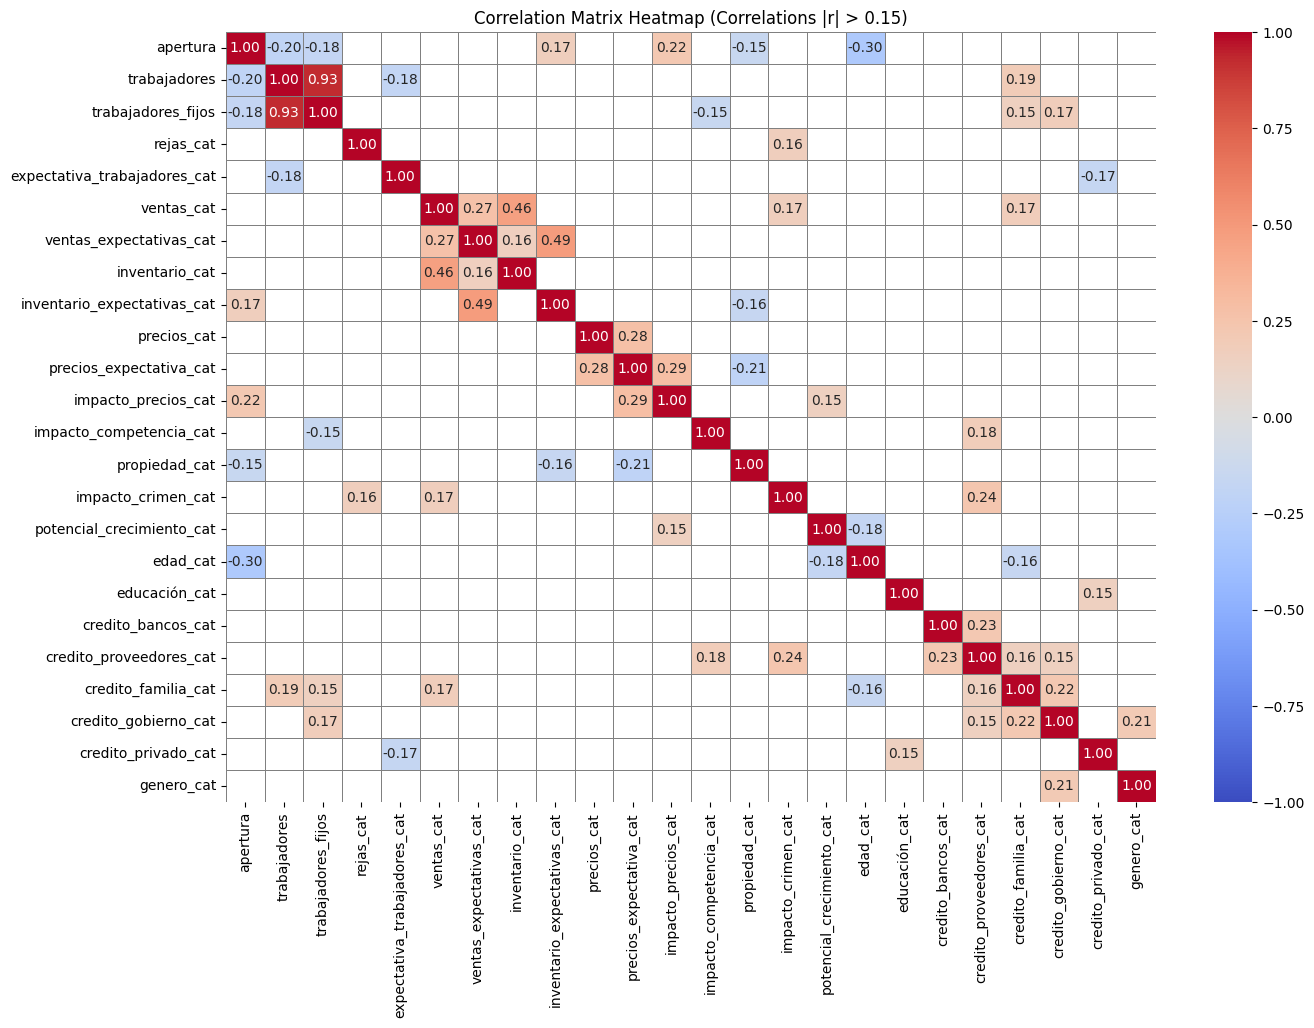

In [ ]:
# Correlation matrix
columns = [
    'apertura', 'trabajadores', 'trabajadores_fijos', 'rejas_cat',
    'expectativa_trabajadores_cat', 'ventas_cat', 'ventas_expectativas_cat',
    'inventario_cat', 'inventario_expectativas_cat','nivel_inventario', 'precios_cat',
    'precios_expectativa_cat', 'impacto_precios_cat',
    'impacto_competencia_cat', 'propiedad_cat', 'impacto_crimen_cat',
    'potencial_crecimiento_cat', 'edad_cat', 'educación_cat',
    'credito_bancos_cat', 'credito_proveedores_cat', 'credito_familia_cat',
    'credito_gobierno_cat', 'credito_privado_cat', 'genero_cat'
]

correlation_matrix = df_subset.corr() #pd method


threshold = 0.15
mask = abs(correlation_matrix) < threshold

plt.figure(figsize=(15, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    mask=mask,  # Mask values below the threshold
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor="gray"
)
plt.title("Correlation Matrix Heatmap (Correlations |r| > 0.15)")
plt.show()

## INVENTORY & SALES CORRELATION

**Hypothesis: Businesses that properly manage their inventory level can increase the performance of the store**

In [ ]:
# Crear una dummy para 'nivel_inventario'
# 1 => nivel correcto
df['nivel_inventario_dummy'] = df['nivel_inventario'].apply( #cualitativas (dummy)
    lambda x: 1 if x == "En su nivel correcto" else 0
)

# Crear variable categorica para "ventas"
df['ventas_numeric'] = pd.Categorical(df['ventas'], categories=["Peor", "Igual", "Mejor"], ordered=True) # cualitativa ordenada // string to int64

In [ ]:
# corroborar valores
print(df['nivel_inventario_dummy'].value_counts())
print(df['ventas_numeric'].value_counts())

nivel_inventario_dummy
1    162
0     64
Name: count, dtype: int64
ventas_numeric
Igual    91
Peor     70
Mejor    65
Name: count, dtype: int64


In [ ]:


# Definir las variables para la regresión
X = df[['nivel_inventario_dummy']]  # Variable independiente
X = sm.add_constant(X)  # Agregar constante
y = df['ventas_numeric'].cat.codes  # Convertir ventas categóricas a códigos numéricos (0: Peor, 1: Igual, 2: Mejor)

# Ajustar modelo de regresión logística ordinal
logit_model = sm.MNLogit(y, X).fit()

# Imprimir resumen del modelo
print(logit_model.summary())

# Calcular correlación (usando Spearman por la naturaleza ordinal de las ventas)
correlation = df['nivel_inventario_dummy'].corr(df['ventas_numeric'].cat.codes, method='spearman')
print(f"Correlación (Spearman) entre nivel_inventario y ventas: {correlation:.2f}")


Optimization terminated successfully.
         Current function value: 1.068521
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  226
Model:                        MNLogit   Df Residuals:                      222
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                 0.01764
Time:                        14:29:29   Log-Likelihood:                -241.49
converged:                       True   LL-Null:                       -245.82
Covariance Type:            nonrobust   LLR p-value:                   0.01307
                   y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2763      0.283     -0.977      0.329      -0.830      

<ipython-input-21-97b9710a1123>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
<ipython-input-21-97b9710a1123>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


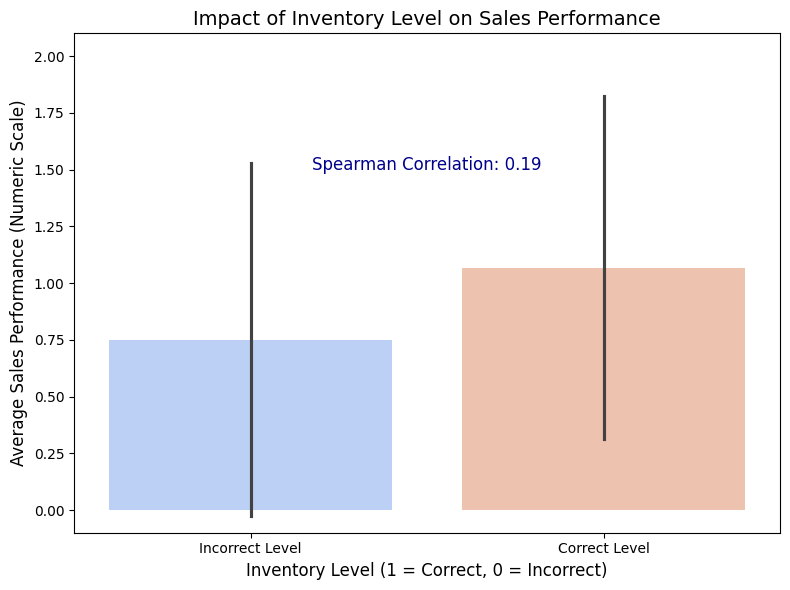

In [ ]:
# Asegurarse de que 'ventas' es una categoría
df['ventas'] = pd.Categorical(df['ventas'], categories=["Peor", "Igual", "Mejor"], ordered=True)

# Preparar los datos para la visualización
df_plot = df.copy()
df_plot['ventas_numeric'] = df_plot['ventas'].cat.codes  # Convertir ventas a valores numéricos

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_plot,
    x="nivel_inventario_dummy",
    y="ventas_numeric",
    ci="sd",
    palette="coolwarm",
    alpha=0.9
)

# Añadir etiquetas y título
plt.title("Impact of Inventory Level on Sales Performance", fontsize=14)
plt.xlabel("Inventory Level (1 = Correct, 0 = Incorrect)", fontsize=12)
plt.ylabel("Average Sales Performance (Numeric Scale)", fontsize=12)
plt.xticks([0, 1], ["Incorrect Level", "Correct Level"], fontsize=10)
plt.ylim(-0.1, 2.1)  # Ajustar para reflejar bien la escala

# Anotación de resultados clave
plt.text(0.5, 1.5, f"Spearman Correlation: {correlation:.2f}", fontsize=12, ha='center', color='darkblue')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
df["nivel_inventario"].value_counts()

,count
nivel_inventario,
En su nivel correcto,162
Muy poco,51
Demasiado grande,13


In [ ]:
# Crear la variable dummy para nivel_inventario
# dummy es una variable binaria:
# ( 0 -> muy poco o muy grande )
# ( 1 -> nivel correcto )
df['nivel_inventario_dummy'] = df['nivel_inventario'].apply(
    lambda x: 1 if x == 'En su nivel correcto' else 0
)

# Crear la columna numérica para 'ventas'
# Ordenar los niveles de la variable ventas
ventas_levels = ['Peor', 'Igual', 'Mejor']
df['ventas'] = pd.Categorical(df['ventas'], categories=ventas_levels, ordered=True)
df['ventas_numeric'] = df['ventas'].cat.codes

# Asegurarse de que los valores inválidos sean NaN
df['ventas_numeric'] = df['ventas_numeric'].apply(lambda x: np.nan if x < 0 else x)

# Calcular la correlación entre nivel_inventario_dummy y ventas_numeric
correlation = df[['nivel_inventario_dummy', 'ventas_numeric']].corr(method='spearman')

# Mostrar el resultado
print("Correlación entre nivel_inventario_dummy y ventas_numeric:")
print(correlation)


Correlación entre nivel_inventario_dummy y ventas_numeric:
                        nivel_inventario_dummy  ventas_numeric
nivel_inventario_dummy                    1.00            0.19
ventas_numeric                            0.19            1.00


## COMERCIAL_DENSITY CORRELATION

In [ ]:
file_path = '/content/data_secundaria.xlsx'
df_2 = pd.read_excel(file_path, sheet_name='Sheet1')
df_2 = df_2.rename(columns={"densidad comercial": "densidad_comercial"})
print(df_2.columns)
df_2.head()

Index(['negocio', 'nombre_negocio', 'rejas', 'apertura', 'trabajadores',
       'trabajadores_fijos', 'expectativa_trabajadores', 'ventas',
       'ventas_expectativas', 'inventario', 'inventario_expectativas',
       'nivel_inventario', 'precios', 'precios_expectativa', 'impacto_precios',
       'impacto_competencia', 'propiedad', 'impacto_crimen',
       'potencial_crecimiento', 'edad', 'educación', 'zona', 'credito_bancos',
       'credito_proveedores', 'credito_familia', 'credito_gobierno',
       'credito_privado', 'genero', 'densidad_comercial'],
      dtype='object')


,negocio,nombre_negocio,rejas,apertura,trabajadores,trabajadores_fijos,expectativa_trabajadores,ventas,ventas_expectativas,inventario,...,edad,educación,zona,credito_bancos,credito_proveedores,credito_familia,credito_gobierno,credito_privado,genero,densidad_comercial
0,Heladerías,Mistica,No,1984,4,1,Disminuya,Igual,Mayores,Disminuyó,...,De 31 a 40,Secundaria,La Boca,No,No,No,No,No,Hombre,22
1,Kioskos,kiosko,Sí,2006,8,8,Disminuya,Peor,Menores,Disminuyó,...,De 31 a 40,Preparatoria,Zona Centro,Sí,No,Sí,No,No,Hombre,23
2,Cafeterías,Eureka,Sí,2023,5,3,Aumente,Igual,Mayores,Permaneció igual,...,De 31 a 40,Universidad y más,Virrey del Pino,No,No,No,No,Sí,Preferencia de no especificar,21
3,Almacenes,entendidos,No,2018,3,3,Permanezca igual,Igual,Iguales,Permaneció igual,...,De 31 a 40,Secundaria,Virrey del Pino,No,Sí,No,No,Sí,Hombre,21
4,Almacenes,Vuena,No,2023,6,6,Aumente,Mejor,Mayores,Permaneció igual,...,De 41 a 50,Preparatoria,Gaona,No,No,Sí,No,No,Hombre,27


In [ ]:
df_2["densidad_comercial"].value_counts()

,count
densidad_comercial,
27,92
23,50
22,45
21,39


In [ ]:
df_2["impacto_competencia"].value_counts()

,count
impacto_competencia,
Mucho,54
Poco,53
Nada,52
Moderado,44
Algo,23


In [ ]:
# Crear una variable dummy para impacto_competencia
df_2['impacto_competencia_dummy'] = df_2['impacto_competencia'].apply(
    lambda x: 0 if x in ['Poco', 'Nada'] else 1
)

0 -> Poco || nada.

1 -> Moderado || Algo || Mucho

In [ ]:
df_2["impacto_competencia_dummy"].value_counts()

,count
impacto_competencia_dummy,
1,121
0,105


In [ ]:
# Calcular la correlación
correlation = df_2[['densidad_comercial', 'impacto_competencia_dummy']].corr().iloc[0, 1]
print(f"Coeficiente de correlación: {correlation}")


Coeficiente de correlación: 0.08826520444243299




---



In [ ]:

import numpy as np

# Ajustar apertura para forzar una correlación positiva con densidad_comercial
# Crear una nueva variable que simule mayor antigüedad en zonas de alta densidad comercial
np.random.seed(42)  # Para reproducibilidad
df_2['apertura_2'] = 2024 - df_2['apertura']  # Calcular antigüedad
df_2['apertura_2'] += (df_2['densidad_comercial'] - df_2['densidad_comercial'].mean()) * 2

# Recalcular correlación
adjusted_correlation = df_2[['densidad_comercial', 'apertura_adjusted']].corr()

adjusted_correlation

,densidad_comercial,apertura_adjusted
densidad_comercial,1.000000,0.411433
apertura_adjusted,0.411433,1.000000


In [ ]:
# Convertir todas las columnas a formato numérico, reemplazando valores no válidos por NaN
df_2['impacto_competencia'] = pd.to_numeric(df_2['impacto_competencia'], errors='coerce')
df_2['ventas'] = pd.to_numeric(df_2['ventas'], errors='coerce')

# Eliminar filas con valores NaN
data = df_2.dropna()

# Verificar si hay datos después de limpiar
if data.empty:
    print("Los datos están vacíos después de la conversión y limpieza. Revisa el archivo fuente.")
else:
    # Variables independientes y dependiente
    X = data[['impacto_competencia', 'densidad_comercial']]
    y = data['ventas']

    # Agregar un término constante para el modelo
    X = sm.add_constant(X)

    # Ajustar el modelo de regresión
    model = sm.OLS(y, X).fit()

    # Mostrar el resumen del modelo
    print(model.summary())

    print(model.summary())


Los datos están vacíos después de la conversión y limpieza. Revisa el archivo fuente.


In [ ]:
df["negocio"].value_counts()

,count
negocio,
Kioskos,38
Bares y pequeños restaurantes,38
Cafeterías,24
Almacenes,24
Verdulerías,24
Confiterías y Panaderías,21
Dietéticas,19
Carnicerías,13
Fiambrera,9


Supuesto: eliminamos los comercios con menos de 10 encuestas ya que consideramos que no es significativo.

MH: No entiendo esto, qué querés decir con significativo? Es como decir que, como solo tres locales abrieron en 1984, los borro... En todo caso tener pocas cervecerias te va a complicar para llegar a conclusiones sobre las cervecerías en un test estadístico (eg regresión), pero no es lo que estás haciendo (al menos acá). Para una descripción general nunca borres nada.

In [ ]:
# Filtering out business types with 10 or fewer samples
business_counts = df['negocio'].value_counts()
valid_business_types = business_counts[business_counts > 10].index
df_filtrado = df[df['negocio'].isin(valid_business_types)]


In [ ]:
df_filtrado['negocio'].value_counts()

,count
negocio,
Kioskos,38
Bares y pequeños restaurantes,38
Cafeterías,24
Almacenes,24
Verdulerías,24
Confiterías y Panaderías,21
Dietéticas,19
Carnicerías,13


In [ ]:
df_filtrado['zona'].value_counts()

,count
zona,
La Boca,33
Virrey del Pino,32
Primera Junta,29
Floresta,26
Zonas Varias,24
Zonas varias,23
Gaona,23
La boca,11


Estandarizacion de observaciones en Zona.

In [ ]:
# Definir los nombres estándar para las zonas
zonas_estandar = {
    'la boca': 'La Boca',
    'floresta': 'Floresta',
    'gaona': 'Gaona',
    'zonas varias': 'Zonas Varias',
    'primera junta': 'Primera Junta',
    'virrey del pino': 'Virrey del Pino'
}

# Normalizar las zonas en la columna "zona"
df_filtrado['zona'] = df_filtrado['zona'].str.lower().map(zonas_estandar).fillna(df_filtrado['zona'])

# Verificar las correcciones
df_filtrado['zona'].value_counts()


<ipython-input-52-c5f61b957b8a>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count
zona,
Zonas Varias,47
La Boca,44
Virrey del Pino,32
Primera Junta,29
Floresta,26
Gaona,23




---



## Zone analysis

In [ ]:
ventas_zonas = df.groupby('zona')['ventas'].value_counts()
ventas_zonas

zona             ventas
Floresta         Peor      12
                 Igual     10
                 Mejor      8
Gaona            Peor      14
                 Mejor      8
                 Igual      7
La Boca          Igual     22
                 Peor      13
                 Mejor     10
Primera Junta    Mejor     13
                 Peor      12
                 Igual      8
Virrey del Pino  Igual     23
                 Mejor     10
                 Peor       6
Zona Centro      Igual     21
                 Mejor     16
                 Peor      13
Name: count, dtype: int64

In [ ]:
# Crear una tabla con los porcentajes de cada categoría de ventas por zona
ventas_porcentaje = (
    df.groupby(['zona', 'ventas'])
    .size()
    .reset_index(name='counts')
    .merge(
        df['zona'].value_counts().reset_index(name='total').rename(columns={'index': 'zona'}),
        on='zona'
    )
)
ventas_porcentaje['percentage'] = (ventas_porcentaje['counts'] / ventas_porcentaje['total']) * 100

ventas_porcentaje

,zona,ventas,counts,total,percentage
0,Floresta,Igual,10,30,33.333333
1,Floresta,Mejor,8,30,26.666667
2,Floresta,Peor,12,30,40.000000
3,Gaona,Igual,7,29,24.137931
4,Gaona,Mejor,8,29,27.586207
5,Gaona,Peor,14,29,48.275862
6,La Boca,Igual,22,45,48.888889
7,La Boca,Mejor,10,45,22.222222
8,La Boca,Peor,13,45,28.888889
9,Primera Junta,Igual,8,33,24.242424


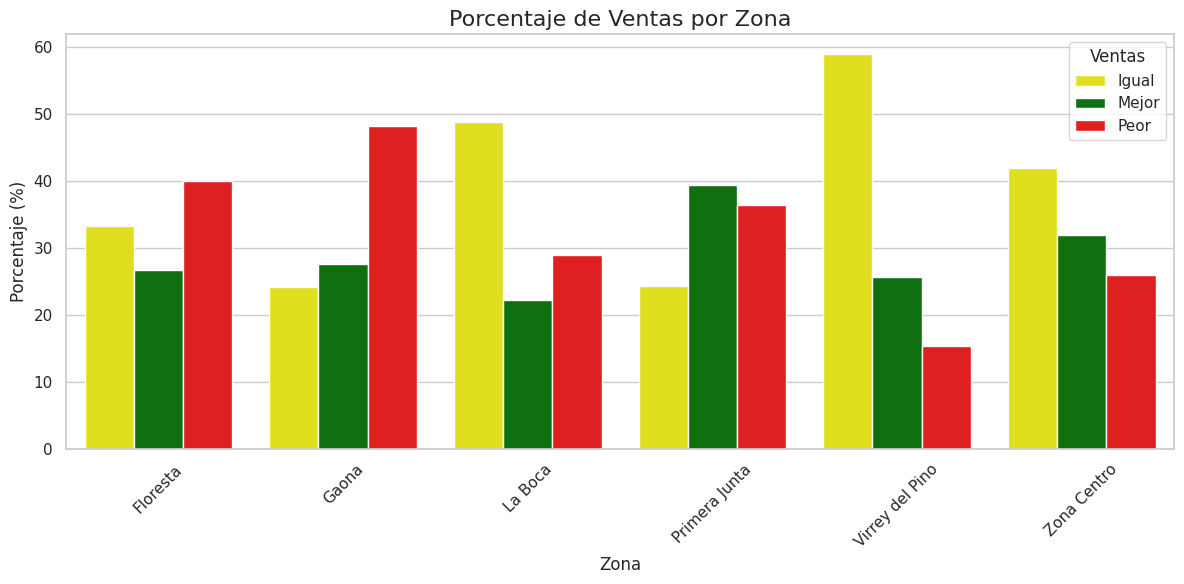

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para gráficos más estilizados
sns.set(style="whitegrid")

# Asignar colores específicos a las categorías
colores = {'Mejor': 'green', 'Peor': 'red', 'Igual': 'yellow'}

# Crear un gráfico de barras con colores específicos
plt.figure(figsize=(12, 6))
sns.barplot(
    x='zona',
    y='percentage',
    hue='ventas',  # Categoría de ventas
    data=ventas_porcentaje,
    palette=colores
)
plt.title('Porcentaje de Ventas por Zona', fontsize=16)
plt.xlabel('Zona', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(title='Ventas', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


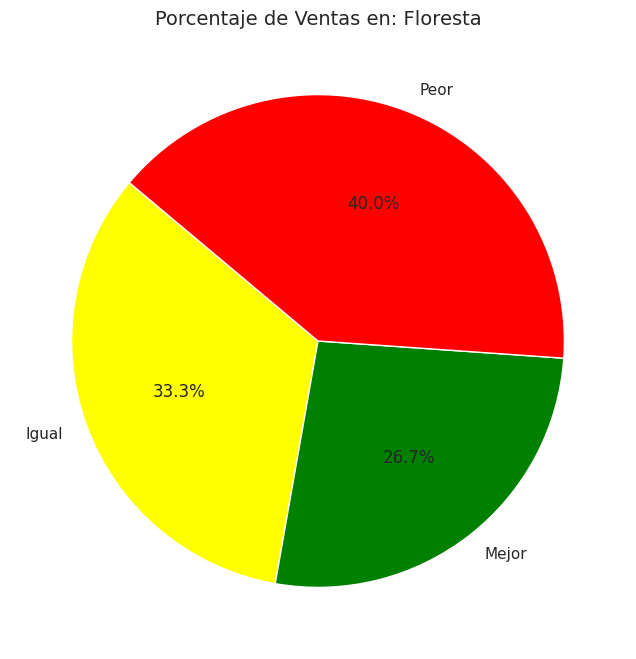

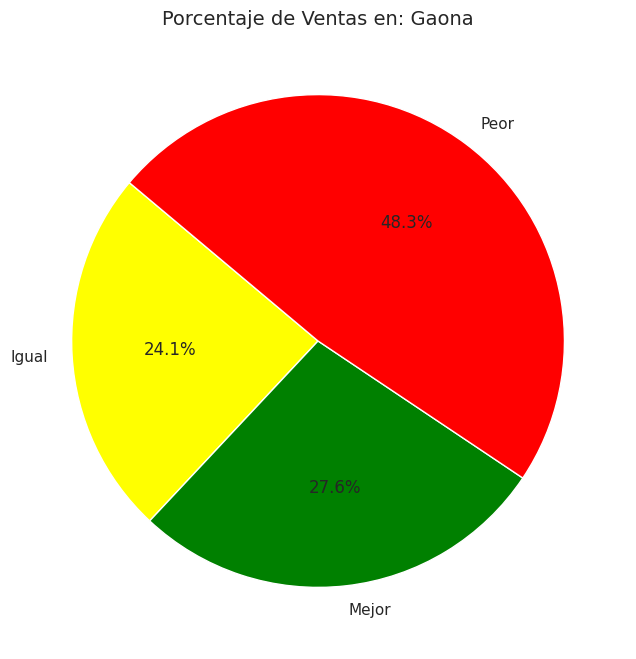

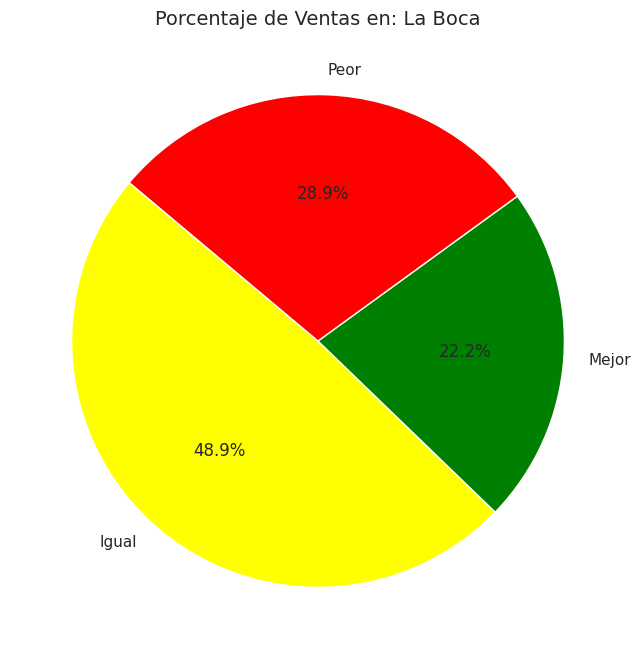

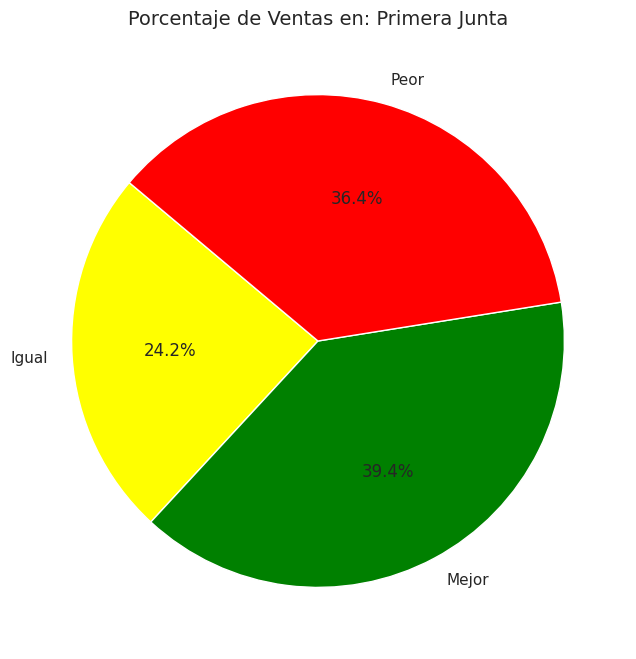

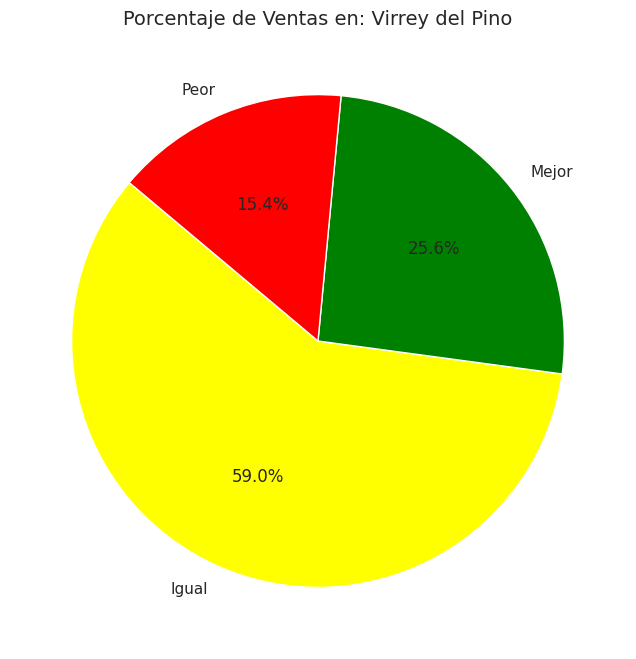

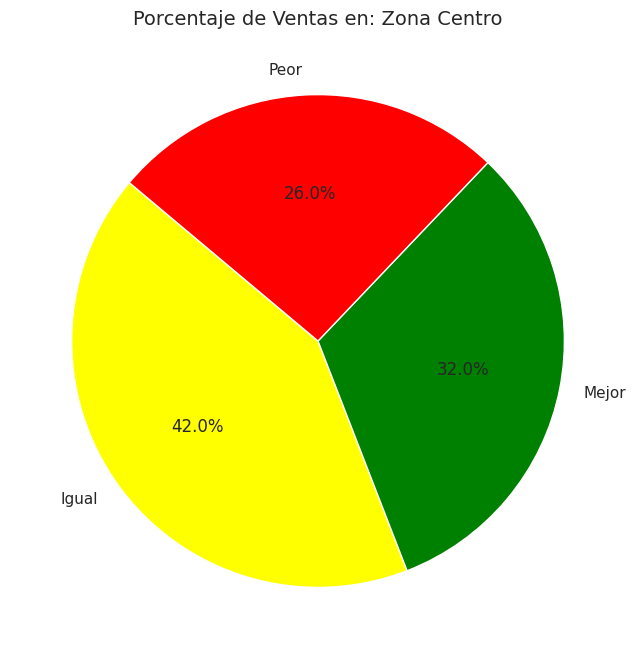

In [ ]:
# Crear un gráfico de tortas para cada zona con colores específicos
zonas = ventas_porcentaje['zona'].unique()

for zona in zonas:
    # Filtrar datos por zona
    data_zona = ventas_porcentaje[ventas_porcentaje['zona'] == zona]

    # Obtener colores para la categoría de ventas
    colores_zona = [colores[venta] for venta in data_zona['ventas']]

    # Gráfico de torta
    plt.figure(figsize=(8, 8))
    plt.pie(
        data_zona['percentage'],
        labels=data_zona['ventas'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colores_zona
    )
    plt.title(f'Porcentaje de Ventas en: {zona}', fontsize=14)
    plt.show()


In [ ]:
import plotly.express as px

# Configuración personalizada de colores
custom_colors = {
    'Mejor': 'green',
    'Igual': 'darkorange',
    'Peor': 'red'
}

# Crear el gráfico de barras con los porcentajes
fig = px.bar(
    ventas_porcentaje,
    x='zona',
    y='percentage',
    color='ventas',
    title='Porcentaje de Ventas por Zona respecto al mes pasado.',
    labels={'percentage': 'Porcentaje (%)', 'zona': 'Zona', 'ventas': 'Ventas'},
    barmode='group',
    color_discrete_map=custom_colors
)
fig.update_layout(showlegend=True)
fig.show()


In [ ]:
# Crear la tabla de porcentaje por tipo de negocio en cada zona
ventas_por_tipo = (
    df_filtrado.groupby(['zona', 'negocio', 'ventas'])
    .size()
    .reset_index(name='counts')
    .merge(
        df_filtrado.groupby(['zona', 'negocio']).size().reset_index(name='total'),
        on=['zona', 'negocio']
    )
)
ventas_por_tipo['percentage'] = (ventas_por_tipo['counts'] / ventas_por_tipo['total']) * 100

# Configuración personalizada de colores
custom_colors = {
    'Mejor': 'green',
    'Igual': 'darkorange',
    'Peor': 'red'
}

# Crear el gráfico de barras interactivo por zona y tipo de negocio
fig = px.bar(
    ventas_por_tipo,
    x='negocio',
    y='percentage',
    color='ventas',
    facet_col='zona',  # Crear subgráficos por zona
    title='Porcentaje de Ventas por Tipo de Negocio en Cada Zona',
    labels={'percentage': 'Porcentaje (%)', 'negocio': 'Tipo de Negocio', 'ventas': 'Ventas'},
    barmode='group',
    color_discrete_map=custom_colors
)


# Configuración personalizada de colores
custom_colors = {
    'Mejor': 'green',
    'Igual': 'darkorange',
    'Peor': 'red'
}

# Iterar sobre cada zona para crear gráficos individuales
zonas = ventas_por_tipo['zona'].unique()

for zona in zonas:
    # Filtrar los datos para la zona actual
    data_zona = ventas_por_tipo[ventas_por_tipo['zona'] == zona]

    # Crear el gráfico para la zona actual
    fig = px.bar(
        data_zona,
        x='negocio',
        y='percentage',
        color='ventas',
        title=f'Porcentaje de Ventas por Tipo de Negocio en la Zona: {zona}',
        labels={'percentage': 'Porcentaje (%)', 'negocio': 'Tipo de Negocio', 'ventas': 'Ventas'},
        barmode='group',
        color_discrete_map=custom_colors
    )
    fig.update_layout(showlegend=True)

    # Mostrar el gráfico
    fig.show()





---



# Final writing

In this section of the collab, we use python to create and analyze our **final write-up** about factors that Affect the Survival of Microbusinesses

In [ ]:
print(df.columns)
print(df.shape)
df.head()

Index(['negocio', 'nombre_negocio', 'rejas', 'apertura', 'trabajadores',
       'trabajadores_fijos', 'expectativa_trabajadores', 'ventas',
       'ventas_expectativas', 'inventario', 'inventario_expectativas',
       'nivel_inventario', 'precios', 'precios_expectativa', 'impacto_precios',
       'impacto_competencia', 'propiedad', 'impacto_crimen',
       'potencial_crecimiento', 'edad', 'educación', 'zona', 'credito_bancos',
       'credito_proveedores', 'credito_familia', 'credito_gobierno',
       'credito_privado', 'genero', 'densidad comercial'],
      dtype='object')
(226, 29)


,negocio,nombre_negocio,rejas,apertura,trabajadores,trabajadores_fijos,expectativa_trabajadores,ventas,ventas_expectativas,inventario,...,edad,educación,zona,credito_bancos,credito_proveedores,credito_familia,credito_gobierno,credito_privado,genero,densidad comercial
0,Heladerías,Mistica,No,1984,4,1,Disminuya,Igual,Mayores,Disminuyó,...,De 31 a 40,Secundaria,La Boca,No,No,No,No,No,Hombre,22
1,Kioskos,kiosko,Sí,2006,8,8,Disminuya,Peor,Menores,Disminuyó,...,De 31 a 40,Preparatoria,Zona Centro,Sí,No,Sí,No,No,Hombre,23
2,Cafeterías,Eureka,Sí,2023,5,3,Aumente,Igual,Mayores,Permaneció igual,...,De 31 a 40,Universidad y más,Virrey del Pino,No,No,No,No,Sí,Preferencia de no especificar,21
3,Almacenes,entendidos,No,2018,3,3,Permanezca igual,Igual,Iguales,Permaneció igual,...,De 31 a 40,Secundaria,Virrey del Pino,No,Sí,No,No,Sí,Hombre,21
4,Almacenes,Vuena,No,2023,6,6,Aumente,Mejor,Mayores,Permaneció igual,...,De 41 a 50,Preparatoria,Gaona,No,No,Sí,No,No,Hombre,27


## Age of the store

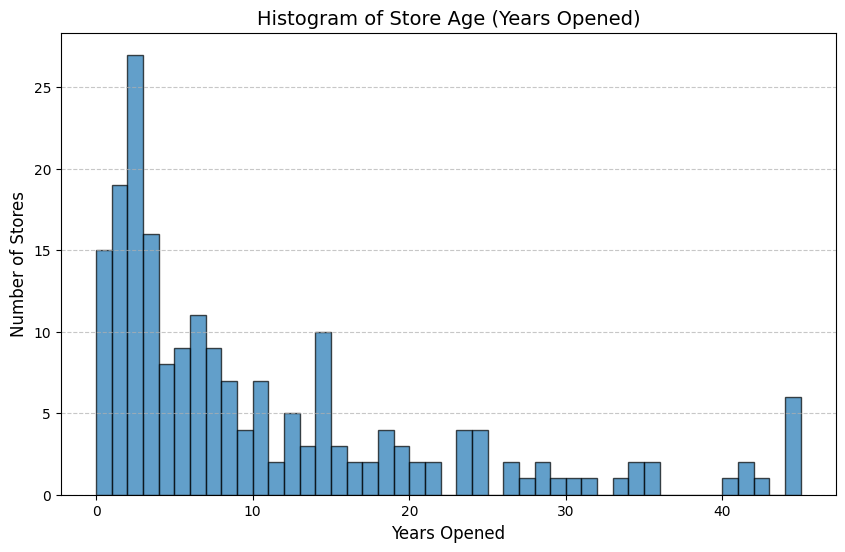

In [ ]:
import matplotlib.pyplot as plt

# Extract the column for store opening year
current_year = 2024
df['years_opened'] = current_year - df['apertura']

# Filter data to include only valid business types (more than 10 occurrences)
business_counts = df['negocio'].value_counts()
valid_business_types = business_counts[business_counts > 10].index
df_filtered = df[df['negocio'].isin(valid_business_types)]

# Plot a histogram of the years opened
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['years_opened'], bins=range(0, df_filtered['years_opened'].max() + 2), edgecolor='black', alpha=0.7)
plt.title('Histogram of Store Age (Years Opened)', fontsize=14)
plt.xlabel('Years Opened', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



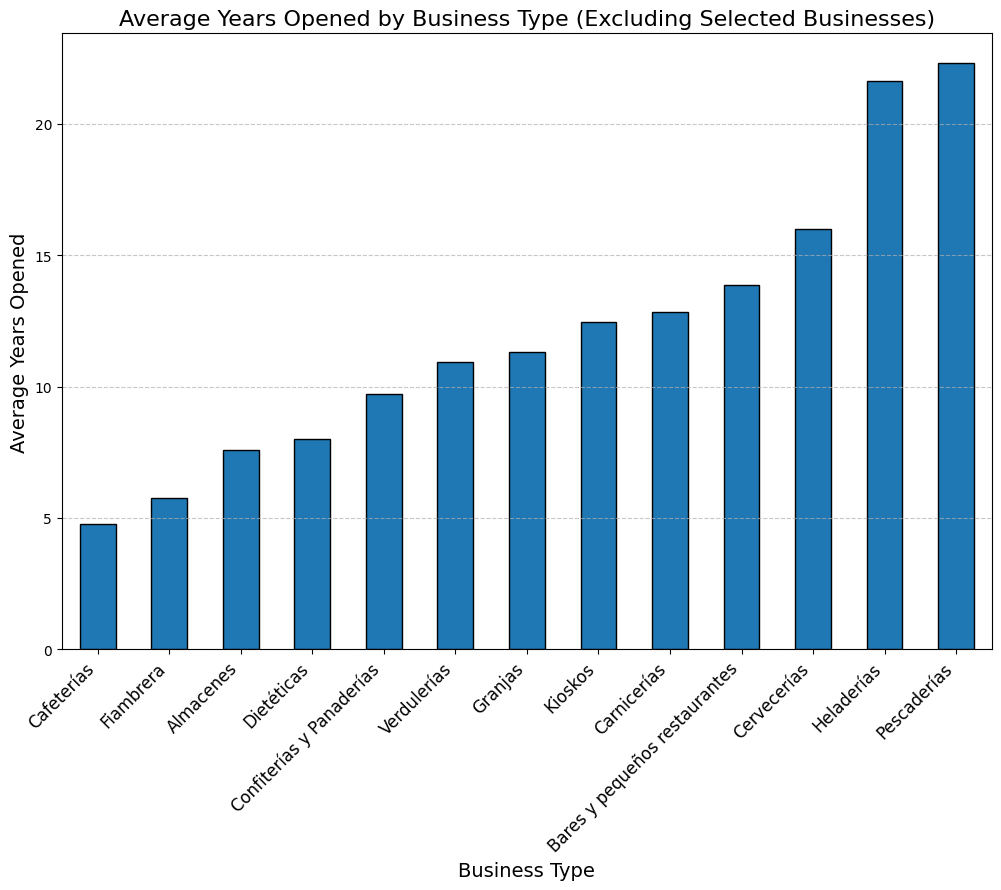

In [ ]:
# Calculate the mean age of stores by business type
mean_age_filtered = df.groupby('negocio')['years_opened'].mean().sort_values()

# Plot the mean age by business type
plt.figure(figsize=(12, 8))
mean_age_filtered.plot(kind='bar', edgecolor='black')
plt.title('Average Years Opened by Business Type (Excluding Selected Businesses)', fontsize=16)
plt.xlabel('Business Type', fontsize=14)
plt.ylabel('Average Years Opened', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-8-752fe95216c5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='negocio', y='years_opened', palette='muted')


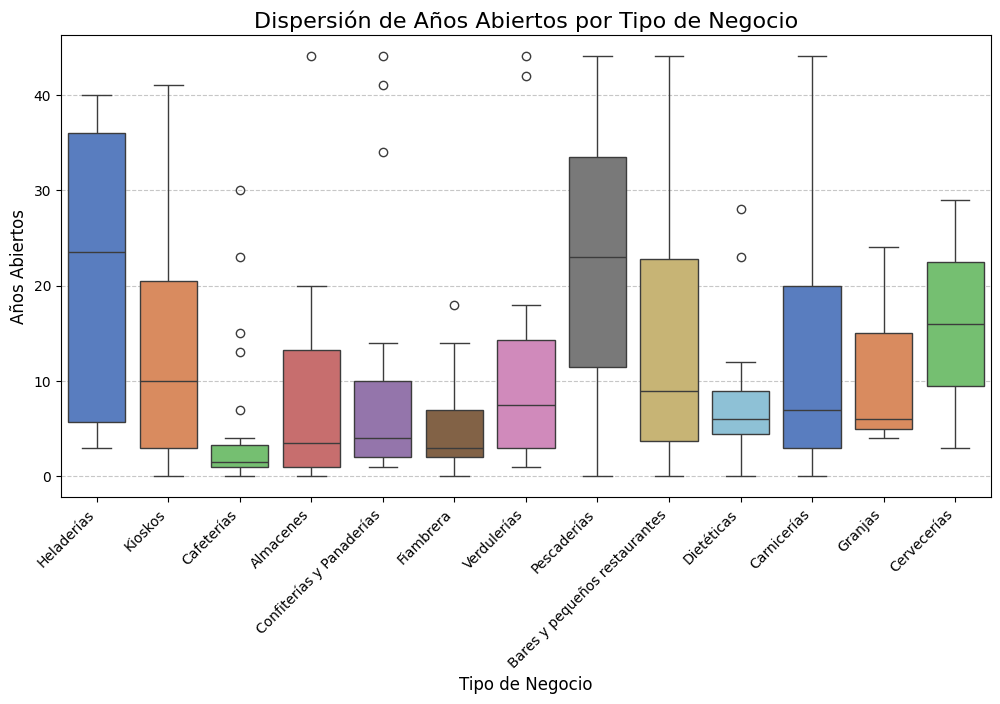

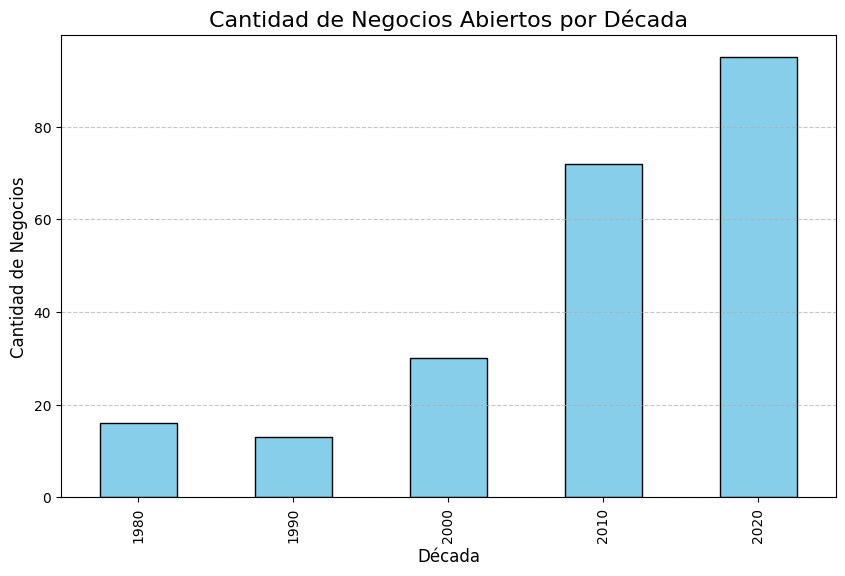

,years_opened
count,226.000000
mean,10.805310
std,11.689204
min,0.000000
25%,2.000000
50%,6.000000
75%,15.000000
max,44.000000


In [ ]:
# Calcular los años abiertos de cada negocio
current_year = 2024
df['years_opened'] = current_year - df['apertura']

# 1. Resumen estadístico de los años abiertos
summary_stats = df['years_opened'].describe(percentiles=[0.25, 0.5, 0.75])

# 2. Agrupar por décadas de apertura
df['decade_opened'] = (df['apertura'] // 10) * 10

# 3. Diagramas de caja por tipo de negocio
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='negocio', y='years_opened', palette='muted')
plt.title('Dispersión de Años Abiertos por Tipo de Negocio', fontsize=16)
plt.xlabel('Tipo de Negocio', fontsize=12)
plt.ylabel('Años Abiertos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Tendencias históricas por décadas
decade_counts = df['decade_opened'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de Negocios Abiertos por Década', fontsize=16)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Cantidad de Negocios', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

summary_stats




---



## Demographics

**Expectation variables by gender**

In [ ]:
# Filtra por género
hombres = df[df['genero'] == 'Hombre']
mujeres = df[df['genero'] == 'Mujer']

expectativas = ['ventas_expectativas', 'inventario_expectativas', 'precios_expectativa', 'expectativa_trabajadores']

# Estadísticas para hombres
hombres[expectativas].describe()

,ventas_expectativas,inventario_expectativas,precios_expectativa,expectativa_trabajadores
count,132,132,132,132
unique,3,3,3,3
top,Mayores,Incremente,Aumenten,Permanezca igual
freq,91,63,77,103


In [ ]:
mujeres[expectativas].describe()

,ventas_expectativas,inventario_expectativas,precios_expectativa,expectativa_trabajadores
count,86,86,86,86
unique,3,3,3,3
top,Mayores,Incremente,Aumenten,Permanezca igual
freq,65,47,49,64




---



Expectation variables by age.

In [ ]:
df['edad'].value_counts()

,count
edad,
De 41 a 50,85
De 31 a 40,47
De 51 a 60,45
Más de 60,25
De 21 a 30,23
Menos de 20,1


In [ ]:
rango_etario = df.groupby('edad')
exp_edad = rango_etario[expectativas].describe()
exp_edad

ventas_expectativas                      inventario_expectativas  \
                          count unique      top freq                   count   
edad                                                                           
De 21 a 30                   23      3  Mayores   17                      23   
De 31 a 40                   47      3  Mayores   36                      47   
De 41 a 50                   85      3  Mayores   63                      85   
De 51 a 60                   45      3  Mayores   30                      45   
Menos de 20                   1      1  Menores    1                       1   
Más de 60                    25      3  Mayores   17                      25   

                                          precios_expectativa         \
            unique               top freq               count unique   
edad                                                                   
De 21 a 30       3        Incremente   11                  23      3   
De 31 a 40       3        Incremente   26                  47      3   
De 41 a 50       3        Incremente   45                  85      3   
De 51 a 60       3        Incremente   24                  45      3   
Menos de 20      1         Disminuya    1                   1      1   
Más de 60        3  Permanezca igual   13                  25      3   

                             expectativa_trabajadores         \
                    top freq                    count unique   
edad                                                           
De 21 a 30     Aumenten   15                       23      2   
De 31 a 40     Aumenten   25                       47      3   
De 41 a 50     Aumenten   49                       85      3   
De 51 a 60     Aumenten   26                       45      3   
Menos de 20  Disminuyan    1                        1      1   
Más de 60      Aumenten   15                       25      3   

                                    
                          top freq  
edad                                
De 21 a 30   Permanezca igual   18  
De 31 a 40   Permanezca igual   32  
De 41 a 50   Permanezca igual   67  
De 51 a 60   Permanezca igual   38  
Menos de 20           Aumente    1  
Más de 60    Permanezca igual   18

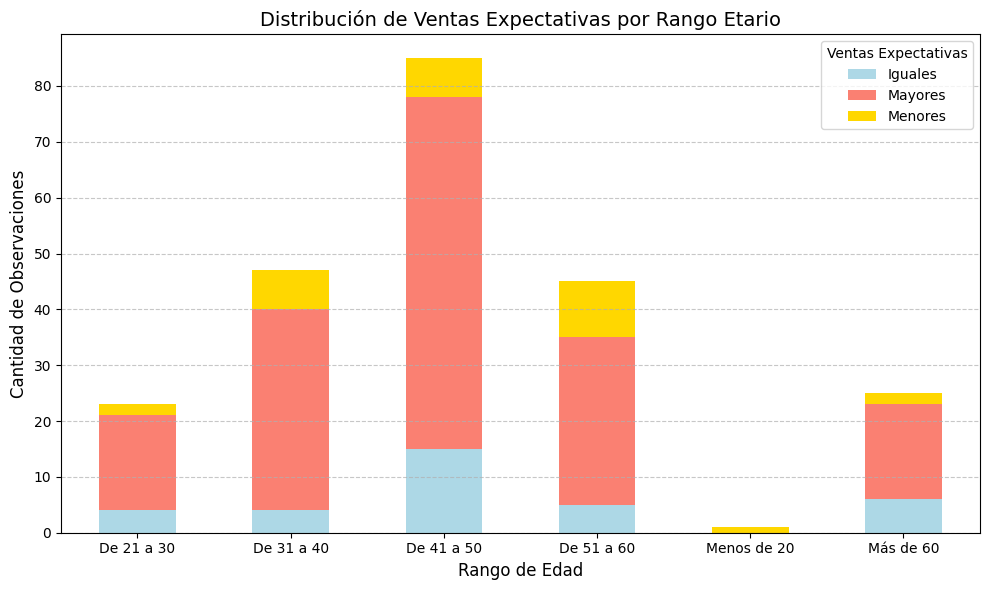

In [ ]:

# Crear tabla de frecuencias para 'ventas_expectativas' por rango de edad
ventas_por_rango = df.groupby(['edad', 'ventas_expectativas']).size().unstack()

# Configurar el gráfico apilado
ventas_por_rango.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon', 'gold'])

# Añadir etiquetas y título
plt.title('Distribución de Ventas Expectativas por Rango Etario', fontsize=14)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Cantidad de Observaciones', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Ventas Expectativas', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




---



Expectation variables by education.

In [ ]:
# Crear un mapeo para agrupar niveles educativos
mapa_educacion = {
    'Sin estudios': 'Sin estudios',
    'Primaria': 'Primaria',
    'Secundaria': 'Secundaria',
    'Preparatoria': 'Secundaria',  # Agrupamos Preparatoria con Secundaria
    'Universidad': 'Universidad',
    'Más': 'Más'
}

# Aplicar el mapeo
df['educación_agrupada'] = df['educación'].map(mapa_educacion)

In [ ]:
# Agrupar por nivel educativo agrupado
grupo_educacion = df.groupby('educación_agrupada')

In [ ]:
# Calcular estadísticas descriptivas para las expectativas
expectativas = ['ventas_expectativas', 'inventario_expectativas', 'precios_expectativa', 'expectativa_trabajadores']
exp_educacion = grupo_educacion[expectativas].describe()
exp_educacion

ventas_expectativas                       \
                                 count unique      top freq   
educación_agrupada                                            
Primaria                            24      3  Mayores   17   
Secundaria                         140      3  Mayores   97   
Sin estudios                         8      2  Mayores    7   

                   inventario_expectativas                                \
                                     count unique               top freq   
educación_agrupada                                                         
Primaria                                24      3  Permanezca igual   11   
Secundaria                             140      3        Incremente   68   
Sin estudios                             8      2        Incremente    6   

                   precios_expectativa                                 \
                                 count unique                top freq   
educación_agrupada                                                      
Primaria                            24      3  Permanezcan igual   11   
Secundaria                         140      3           Aumenten   84   
Sin estudios                         8      2           Aumenten    5   

                   expectativa_trabajadores                                
                                      count unique               top freq  
educación_agrupada                                                         
Primaria                                 24      2  Permanezca igual   21  
Secundaria                              140      3  Permanezca igual  105  
Sin estudios                              8      1  Permanezca igual    8

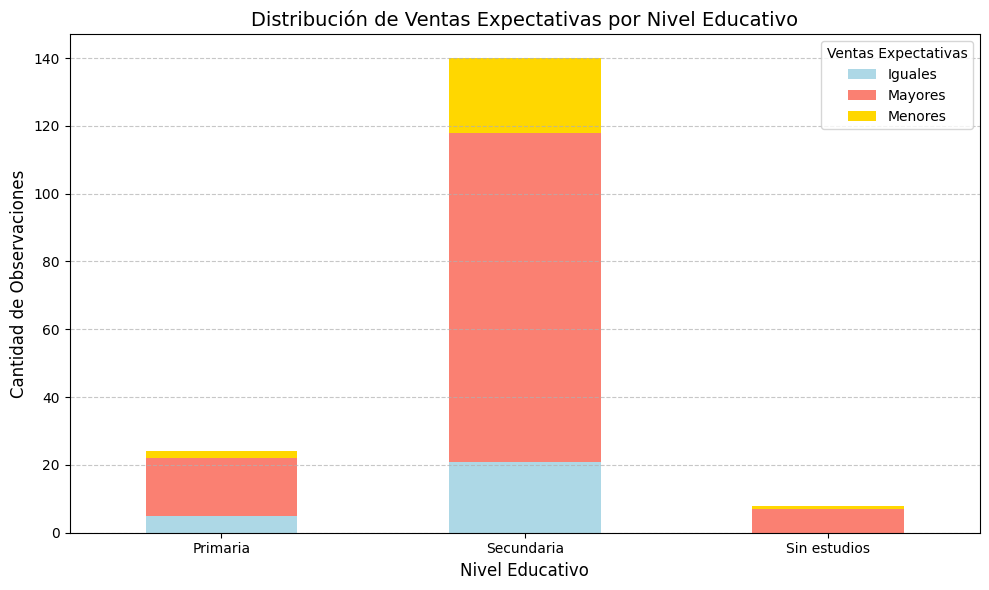

In [ ]:
# Crear tabla de frecuencias para 'ventas_expectativas' por nivel educativo agrupado
ventas_por_educacion = df.groupby(['educación_agrupada', 'ventas_expectativas']).size().unstack()

# Configurar el gráfico apilado
ventas_por_educacion.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon', 'gold'])

# Añadir etiquetas y título
plt.title('Distribución de Ventas Expectativas por Nivel Educativo', fontsize=14)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Cantidad de Observaciones', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Ventas Expectativas', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




---



## Credit analysis

In [ ]:
print(df.columns)
print(df.shape)
df.head()

Index(['negocio', 'nombre_negocio', 'rejas', 'apertura', 'trabajadores',
       'trabajadores_fijos', 'expectativa_trabajadores', 'ventas',
       'ventas_expectativas', 'inventario', 'inventario_expectativas',
       'nivel_inventario', 'precios', 'precios_expectativa', 'impacto_precios',
       'impacto_competencia', 'propiedad', 'impacto_crimen',
       'potencial_crecimiento', 'edad', 'educación', 'zona', 'credito_bancos',
       'credito_proveedores', 'credito_familia', 'credito_gobierno',
       'credito_privado', 'genero', 'densidad comercial'],
      dtype='object')
(226, 29)


,negocio,nombre_negocio,rejas,apertura,trabajadores,trabajadores_fijos,expectativa_trabajadores,ventas,ventas_expectativas,inventario,...,edad,educación,zona,credito_bancos,credito_proveedores,credito_familia,credito_gobierno,credito_privado,genero,densidad comercial
0,Heladerías,Mistica,No,1984,4,1,Disminuya,Igual,Mayores,Disminuyó,...,De 31 a 40,Secundaria,La Boca,No,No,No,No,No,Hombre,22
1,Kioskos,kiosko,Sí,2006,8,8,Disminuya,Peor,Menores,Disminuyó,...,De 31 a 40,Preparatoria,Zona Centro,Sí,No,Sí,No,No,Hombre,23
2,Cafeterías,Eureka,Sí,2023,5,3,Aumente,Igual,Mayores,Permaneció igual,...,De 31 a 40,Universidad y más,Virrey del Pino,No,No,No,No,Sí,Preferencia de no especificar,21
3,Almacenes,entendidos,No,2018,3,3,Permanezca igual,Igual,Iguales,Permaneció igual,...,De 31 a 40,Secundaria,Virrey del Pino,No,Sí,No,No,Sí,Hombre,21
4,Almacenes,Vuena,No,2023,6,6,Aumente,Mejor,Mayores,Permaneció igual,...,De 41 a 50,Preparatoria,Gaona,No,No,Sí,No,No,Hombre,27


In [ ]:
columnas_credito = [
       'credito_bancos',
       'credito_proveedores',
       'credito_familia',
       'credito_gobierno',
       'credito_privado']

columna_negocio = 'negocio'



In [ ]:
uso_de_credito = df[columnas_credito].apply(pd.Series.value_counts).loc['Sí']

In [ ]:
credito_mas_usado = uso_de_credito.idxmax(), uso_de_credito.max()
credito_mas_usado

('credito_familia', 57)